In [0]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd drive
%cd 'My Drive'

In [0]:
os.chdir('/content/drive/My Drive')
#!unzip background

In [0]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

In [0]:
!git clone https://www.github.com/matterport/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [0]:
os.chdir('Mask_RCNN')
ROOT_DIR = os.getcwd()

In [0]:
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))
sys.path.append(os.path.join(ROOT_DIR, "mrcnn/"))

In [0]:
import mrcnn
from mrcnn.config import Config
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

Using TensorFlow backend.


In [0]:
# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Path to Shapes trained weights
SHAPES_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_shapes.h5")

In [0]:
import coco
config = coco.CocoConfig()

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

In [0]:
import tensorflow as tf
# Create model in inference mode
model = modellib.MaskRCNN(mode="inference", model_dir='content/Mask_RCNN/mask_rcnn_coco.h5',
                              config=config)

# Set weights file path
if config.NAME == "shapes":
    weights_path = SHAPES_MODEL_PATH
elif config.NAME == "coco":
    weights_path = COCO_MODEL_PATH
# Or, uncomment to load the last model you trained
# weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

In [0]:
from glob import glob

background_images = []
background_folder = glob(os.path.join('/content/drive/My Drive/background', '*.jpg'))
  
for p in background_folder:
  background_images.append(plt.imread(str(p)))

In [0]:
from google.colab import files
import PIL
import random
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob

for j in range(90, 197):
  print(j)
  images = []
  os.chdir('/content/drive/My Drive/data/train/' + str(j))
  folder = glob(os.path.join('/content/drive/My Drive/data/train/' + str(j), '*.jpg'))

  for i in folder:
    images.append(plt.imread(str(i)))

  counter = 0

  for k in images:
    try:
      results = model.detect([k], verbose=1)
      mask = results[0]['masks']

      temp_image = np.copy(k)
      for m in range(k.shape[0]):
        for n in range(k.shape[1]):
          if mask[m][n][0] != False:
            continue
          else:
            for l in range(3):
              temp_image[m][n][l] = 0

      index = random.randint(0, 19)
      background = background_images[index]

      edited_back = cv2.resize(background, (k.shape[1], k.shape[0]))
      new_image = np.copy(edited_back)

      for q in range(k.shape[0]):
        for w in range(k.shape[1]):
          for e in range(3):
            if temp_image[q][w][e] != 0:
              new_image[q][w][e] = temp_image[q][w][e]

      counter = counter + 1

      im = Image.fromarray(new_image)
      im.save('new' + str(j) + "_" + str(counter) + '.png')
    except:
      continue

90
Processing 1 images
image                    shape: (225, 300, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (299, 601, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (194, 259, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  15

In [0]:
from google.colab import files
import PIL
from PIL import Image

counter = 0

for k in images:
  results = model.detect([k], verbose=1)
  mask = results[0]['masks']
  
  temp_image = np.copy(k)
  for i in range(k.shape[0]):
    for j in range(k.shape[1]):
      if mask[i][j][0] != False:
        continue
      else:
        for l in range(3):
          temp_image[i][j][l] = 0
         
  edited_back = cv2.resize(background, (k.shape[1], k.shape[0]))
  new_image = np.copy(edited_back)

  for q in range(k.shape[0]):
    for w in range(k.shape[1]):
      for e in range(3):
        if temp_image[q][w][e] != 0:
          new_image[q][w][e] = temp_image[q][w][e]
  
  counter = counter + 1
  
  im = Image.fromarray(new_image)
  im.save('new' + str(counter) + '.png')

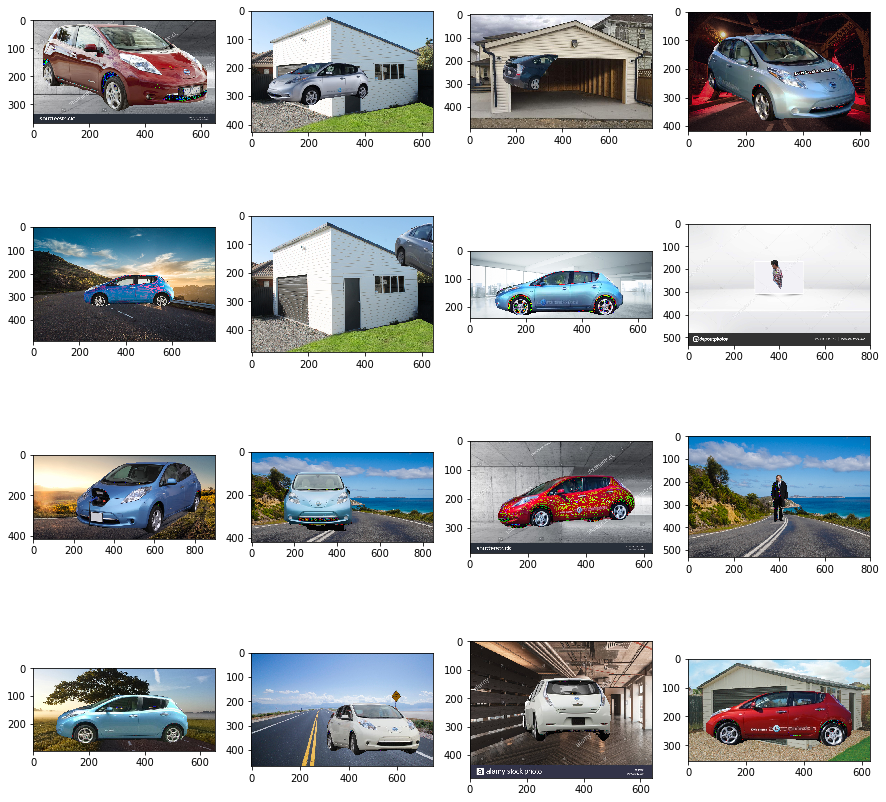

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

os.chdir('/content/drive/My Drive/data/train/168')

fig = plt.gcf()
fig.set_size_inches(15, 15)
images_paths = os.listdir('/content/drive/My Drive/data/train/168')

nrows = 4
ncols = 4
pic_index = 36

pic_index += 16
pics = [os.path.join(fname) for fname in images_paths[pic_index-16:pic_index]]

for i, img_path in enumerate(pics):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    #sp.axis('Off') # Don't show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()